In [3]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LinearRegression
from sklearn.metrics import (
    confusion_matrix,
    classification_report,
    mean_squared_error,
    mean_absolute_percentage_error,
    r2_score
)
from sklearn.utils import resample


In [5]:

def evaluate_knn_classifier(X, y, k=3):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_train_pred = knn.predict(X_train)
    y_test_pred = knn.predict(X_test)
    return {
        'train_conf_matrix': confusion_matrix(y_train, y_train_pred),
        'train_report': classification_report(y_train, y_train_pred, output_dict=True, zero_division=0),
        'test_conf_matrix': confusion_matrix(y_test, y_test_pred),
        'test_report': classification_report(y_test, y_test_pred, output_dict=True, zero_division=0),
    }

def evaluate_regression_metrics(X, y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
    model = LinearRegression()
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    return {
        'mse': mean_squared_error(y_test, y_pred),
        'rmse': np.sqrt(mean_squared_error(y_test, y_pred)),
        'mape': mean_absolute_percentage_error(y_test, y_pred),
        'r2': r2_score(y_test, y_pred)
    }

def generate_synthetic_training_data(n=20, seed=42):
    np.random.seed(seed)
    X = np.random.uniform(1, 10, size=(n, 2))
    y = np.array([0 if x + y < 12 else 1 for x, y in X])
    return X, y

def plot_training_data(X, y):
    plt.figure(figsize=(6,6))
    for i in range(len(X)):
        color = 'blue' if y[i] == 0 else 'red'
        plt.scatter(X[i][0], X[i][1], color=color)
    plt.title("Synthetic Training Data")
    plt.xlabel("X")
    plt.ylabel("Y")
    plt.grid(True)
    plt.show()

def classify_grid(X_train, y_train, k=3):
    x_vals = np.arange(0, 10.1, 0.1)
    y_vals = np.arange(0, 10.1, 0.1)
    xx, yy = np.meshgrid(x_vals, y_vals)
    test_points = np.c_[xx.ravel(), yy.ravel()]
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    preds = knn.predict(test_points)
    return test_points, preds

def plot_classified_grid(test_points, preds, X_train, y_train, k):
    plt.figure(figsize=(8,8))
    plt.scatter(test_points[:, 0], test_points[:, 1], c=preds, cmap='bwr', alpha=0.2, s=1)
    plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap='bwr', edgecolors='k', s=20)
    plt.title(f"Grid Classification (k={k})")
    plt.xlabel("X")
    plt.ylabel("Y")
    plt.grid(True)
    plt.show()

def classify_and_plot_for_multiple_k(X_train, y_train, k_values):
    for k in k_values:
        test_points, preds = classify_grid(X_train, y_train, k)
        plot_classified_grid(test_points, preds, X_train, y_train, k)

def classify_project_data(df, feature_cols, target_col, k=3):
    X = df[feature_cols].to_numpy()
    y = df[target_col].to_numpy()
    test_points, preds = classify_grid(X, y, k)
    plot_classified_grid(test_points, preds, X, y, k)

def find_best_k(df, feature_cols, target_col, k_range=range(1, 20, 2)):
    X = df[feature_cols]
    y = df[target_col]
    param_grid = {'n_neighbors': list(k_range)}
    grid = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5)
    grid.fit(X, y)
    return grid.best_params_, grid.best_score_


In [6]:

df = pd.read_csv("DCT_mal.csv")
numeric_cols = df.select_dtypes(include=np.number).columns.tolist()
feature_cols = numeric_cols[:2]
target_col = numeric_cols[-1]

# Optional: balance the dataset
df_major = df[df[target_col] == df[target_col].mode()[0]]
df_minor = df[df[target_col] != df[target_col].mode()[0]]
df_major_downsampled = resample(df_major, replace=False, n_samples=len(df_minor), random_state=42)
df_balanced = pd.concat([df_major_downsampled, df_minor])

# A1
results_a1 = evaluate_knn_classifier(df_balanced[feature_cols], df_balanced[target_col])
print("A1 - Training Confusion Matrix:\n", results_a1['train_conf_matrix'])
print("A1 - Testing Confusion Matrix:\n", results_a1['test_conf_matrix'])

# A2
results_a2 = evaluate_regression_metrics(df[feature_cols], df[numeric_cols[2]])
print("\nA2 - Regression Metrics:")
print(results_a2)

# A3
X_syn, y_syn = generate_synthetic_training_data()
plot_training_data(X_syn, y_syn)

# A4
test_pts, preds = classify_grid(X_syn, y_syn, k=3)
plot_classified_grid(test_pts, preds, X_syn, y_syn, k=3)

# A5
classify_and_plot_for_multiple_k(X_syn, y_syn, k_values=[1, 3, 5, 7, 9])

# A6
classify_project_data(df_balanced, feature_cols, target_col, k=3)

# A7
best_k, best_score = find_best_k(df_balanced, feature_cols, target_col)
print("\nA7 - Best k value:", best_k)
print("A7 - Best cross-validation score:", best_score)


ValueError: Cannot sample 6248 out of arrays with dim 507 when replace is False

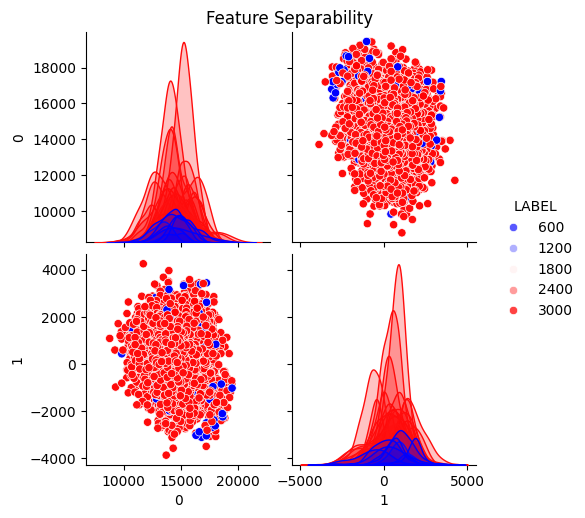

In [ ]:
# visualize separability
sns.pairplot(df[[*feature_cols, target_col]], hue=target_col, palette='bwr')
plt.suptitle("Feature Separability", y=1.02)
plt.show()
